# Перцептрон

Многослойный перцептрон (MLP) — это тип искусственной нейронной сети, используемый для задач классификации и регрессии. Он состоит из нескольких слоев нейронов, где каждый слой связан с предыдущим и последующим. Входные данные поступают в первый слой, проходят через скрытые слои, и результат передаётся на выходной слой, который генерирует прогноз.

## Из методички

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

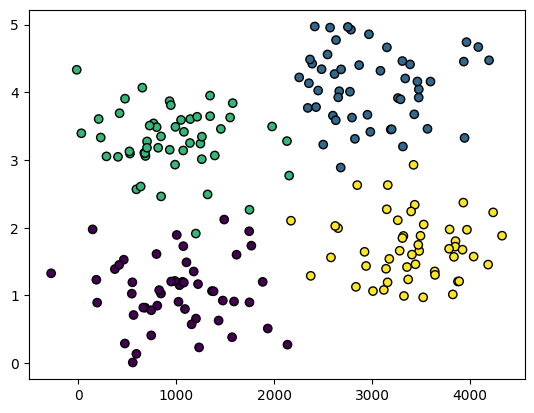

In [3]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8]) # 4 кластера, задача множественной классификации
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

# диаграмма рассеяния
plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [4]:
from sklearn.neural_network import MLPClassifier

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X, y)

In [6]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [7]:
for i in range(len(clf.coefs_)): # весп по каждому нейрону отдельно
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

    # 4 класса - 4 нейрона на выходномслое
    # 2 атрибута - 2 неройна на входном слое

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [8]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [10]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

In [11]:
accuracy_score(y, clf.predict(X))

0.25

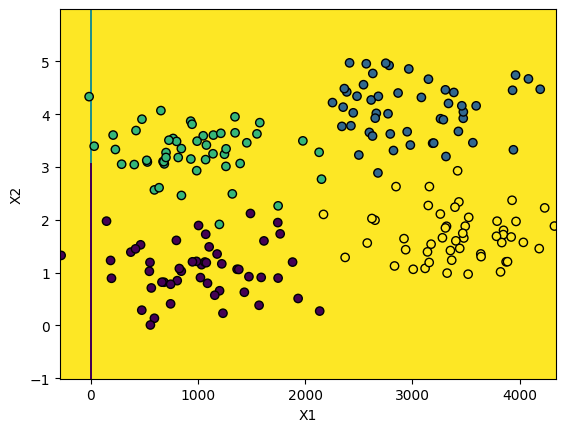

In [12]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_scaled = StandardScaler().fit_transform(X) # необходимо нормализовать данные

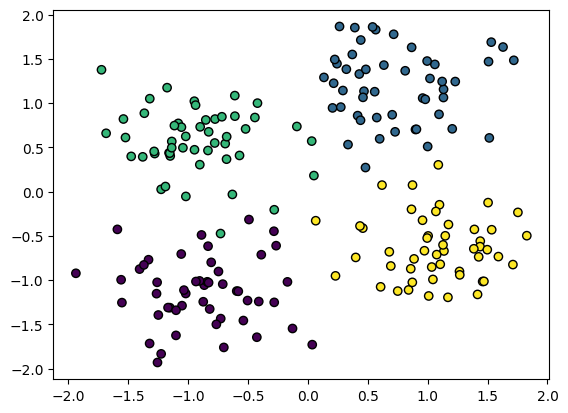

In [15]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)

In [16]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X_scaled, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
accuracy_score(y, clf.predict(X_scaled))

0.75

In [18]:
confusion_matrix(y, clf.predict(X_scaled))

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]])

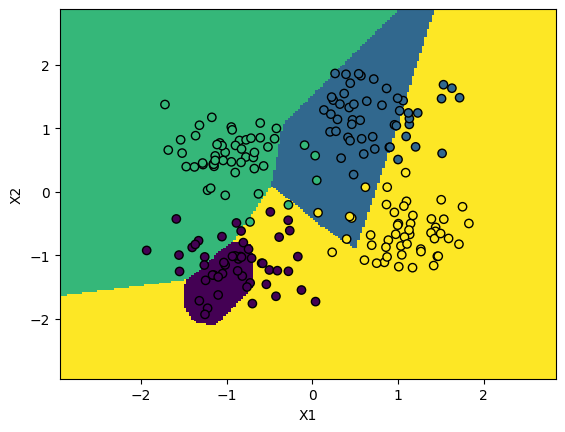

In [19]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [20]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1, max_iter=10000).fit(X_scaled, y)

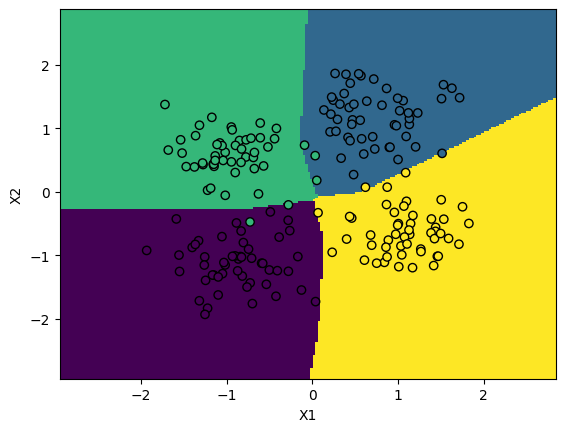

In [21]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [22]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)

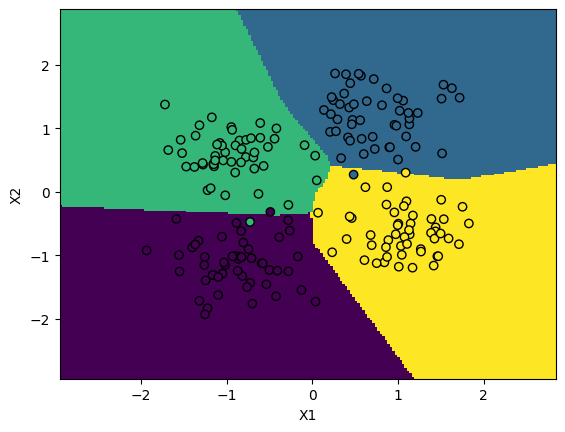

In [23]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Задания для самостоятельного выполнения

*1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.*

Точность модели с 1 нейронами: 0.2500


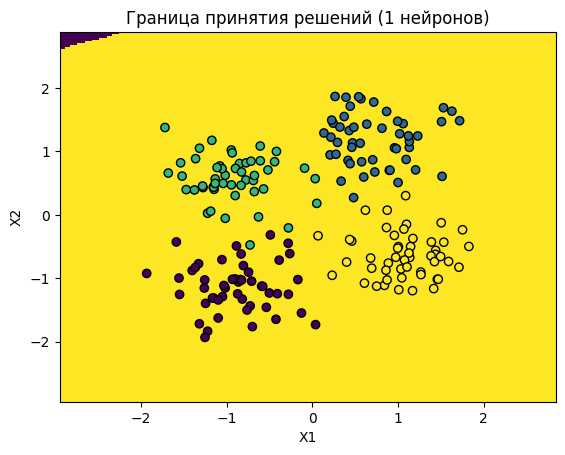

Точность модели с 2 нейронами: 0.9800


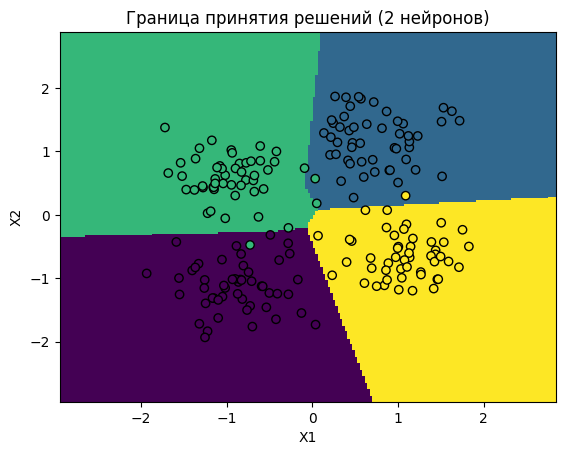

Точность модели с 10 нейронами: 0.9800


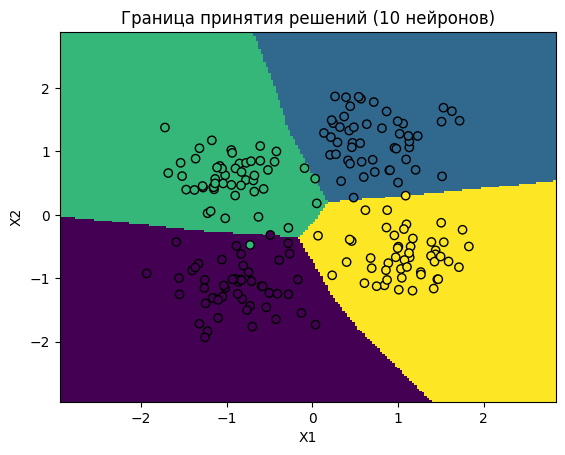

Точность модели с 100 нейронами: 0.9950


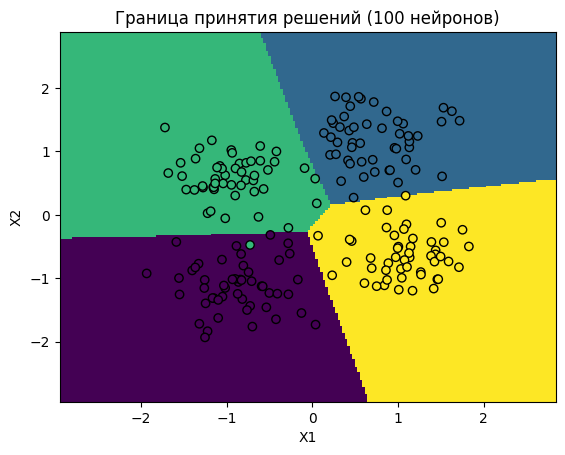

In [24]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, centers=blob_centers, cluster_std=0.5, random_state=0)
X[:, 0] *= 1000

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def plot_decision_boundary(clf, X, y, title):
    X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)

    plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.show()

hidden_neurons = [1, 2, 10, 100]
accuracy_scores = {}


for neurons in hidden_neurons:
    clf = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=10_000, random_state=1).fit(X_scaled, y)
    y_pred = clf.predict(X_scaled)
    print(f"Точность модели с {neurons} нейронами: {accuracy_score(y, y_pred):.4f}")
    plot_decision_boundary(clf, X_scaled, y, f"Граница принятия решений ({neurons} нейронов)")


1 нейрон - модель плохо обучилась и не может разделить сложные данные, 2 нейрона - граница более сложная, но ограничена линейными комбинациями, 10-100 нейронов - граница более гибкая.

*2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.*

Точность модели с (10, 10) скрытыми слоями: 0.9900


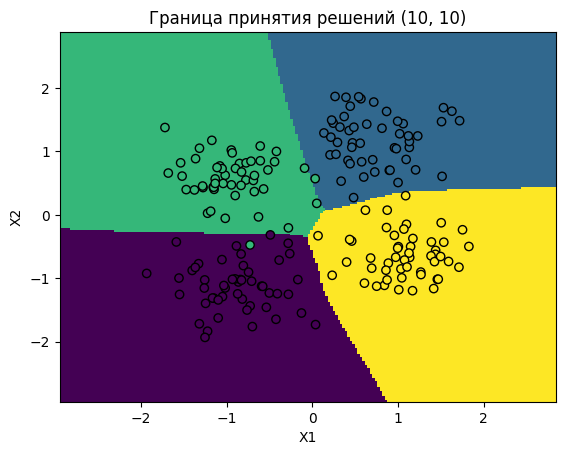

Точность модели с (10, 10, 10) скрытыми слоями: 0.9900


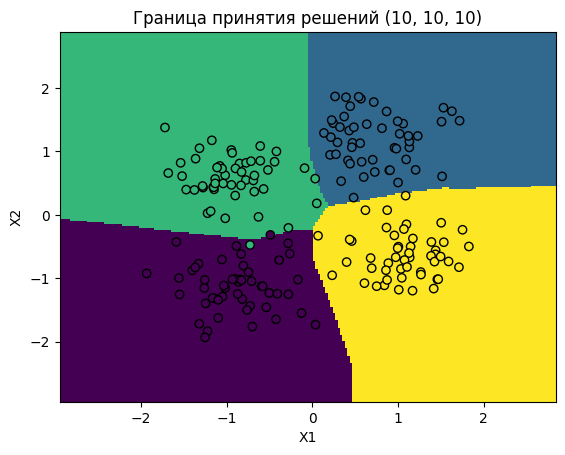

Точность модели с (10, 10, 10, 10, 10, 10, 10, 10, 10, 10) скрытыми слоями: 0.9950


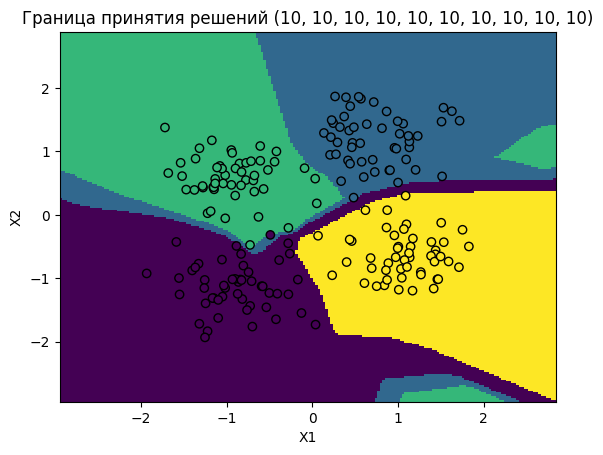

In [25]:
hidden_layers_list = [(10, 10), (10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10)]


for layers in hidden_layers_list:
    clf = MLPClassifier(hidden_layer_sizes=layers, max_iter=10_000, random_state=1).fit(X_scaled, y)
    y_pred = clf.predict(X_scaled)
    print(f"Точность модели с {layers} скрытыми слоями: {accuracy_score(y, y_pred):.4f}")
    plot_decision_boundary(clf, X_scaled, y, f"Граница принятия решений {layers}")



*3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.*

In [26]:
for i, weights in enumerate(clf.coefs_):
    print(f"Веса между слоем {i} и слоем {i+1}:")
    print(weights)
    print()


for i, biases in enumerate(clf.intercepts_):
    print(f"Веса смещения для слоя {i+1}:")
    print(biases)
    print()

Веса между слоем 0 и слоем 1:
[[-7.38620089e-02  4.03308573e-01 -7.15533851e-01 -1.49090423e-01
  -7.09121517e-01 -7.05207747e-01 -6.87041331e-01 -1.43272733e-02
  -1.26639535e-01  1.03782162e-01]
 [-9.08972998e-02  4.51951068e-01 -5.83069165e-01  8.78067542e-01
  -7.25239455e-01  2.70559543e-01 -1.61971809e-01  1.62468894e-04
  -6.99359722e-01 -6.59834250e-01]]

Веса между слоем 1 и слоем 2:
[[-5.14434755e-01 -7.83249539e-02  4.66394458e-01  1.90847370e-06
   3.02738087e-01 -2.55080850e-01  2.34467982e-01  2.81705871e-01
  -2.74478757e-01  4.31868063e-01]
 [ 4.46425371e-01  4.44809056e-01 -7.17566884e-02  4.98194711e-02
  -1.98094647e-01  7.71762925e-02  6.53157159e-01 -5.19782818e-01
  -1.95562027e-01 -1.60230327e-01]
 [-5.33277482e-01  2.56049339e-02 -4.31676207e-01 -2.55239941e-02
  -3.10084986e-01 -5.20025343e-01  1.87590631e-01 -5.91961918e-01
   5.71590676e-02  2.02826225e-01]
 [-4.25262630e-01  2.79812029e-01  3.62233396e-01 -3.12371998e-04
  -5.69720042e-01  2.74181699e-01  4.

*4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.*

In [27]:
import time

In [28]:
def train_and_evaluate(hidden_layers):
    start_time = time.time()
    clf = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=10000, random_state=1, verbose=False).fit(X_scaled, y)
    end_time = time.time()

    y_pred = clf.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    print(f"Модель {hidden_layers}")
    print(f"Время обучения: {end_time - start_time:.4f} секунд")
    print(f"Точность: {acc:.4f}")
    print("Матрица классификации:\n", cm, "\n")

    return clf


models = {
    "Простая (6 нейронов, 1 слой)": (6,),
    "Средняя (10 нейронов, 3 слоя)": (10, 10, 10),
    "Глубокая (50 нейронов, 10 слоев)": (50,) * 10,
}

trained_models = {}
for name, layers in models.items():
    trained_models[name] = train_and_evaluate(layers)


Модель (6,)
Время обучения: 1.4732 секунд
Точность: 0.9650
Матрица классификации:
 [[50  0  0  0]
 [ 0 49  0  1]
 [ 2  3 45  0]
 [ 0  1  0 49]] 

Модель (10, 10, 10)
Время обучения: 0.7677 секунд
Точность: 0.9900
Матрица классификации:
 [[49  0  1  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]] 

Модель (50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Время обучения: 0.7679 секунд
Точность: 1.0000
Матрица классификации:
 [[50  0  0  0]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]] 



*5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).*

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start_time = time.time()
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000, random_state=42, verbose=False)
clf.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Время обучения: {end_time - start_time:.2f} секунд")
print(f"Точность модели: {accuracy:.4f}")
print("Матрица классификации:")
print(conf_matrix)


Время обучения: 0.37 секунд
Точность модели: 0.9667
Матрица классификации:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


*6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.*

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

X = df.drop(["id", "date", "price"], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start_time = time.time()
regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42, verbose=False)
regressor.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print(f"Время обучения: {end_time - start_time:.2f} секунд")
print(f"Среднеквадратическая ошибка: {mse:.2f}")


Время обучения: 35.40 секунд
Среднеквадратическая ошибка: 159617380501.79


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
